# Adaptab_python2
Notebook creado para hacer análisis adicionales a los q hice en Excel

In [1]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
path=("/Users/alejandronaranjo/OneDrive - Universidad de San Buenaventura Medellín/03. Investigación/08 Inv. Adaptabilidad/06 Python_adaptab/01 Datos")
os.listdir(path)
os.chdir(path)

In [3]:
ls

BaseCSV_adap_complem.csv     SensacPref.png
BaseCSV_adap_orig.csv        sensac_pref_orig.csv
ProcesamDatos_4Nov2019.xlsx*


In [4]:
datos = pd.read_csv("sensac_pref_orig.csv")
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1631 entries, 0 to 1630
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          1631 non-null   int64  
 1   Ciudad              1630 non-null   object 
 2   genero              1624 non-null   object 
 3   edad                1630 non-null   float64
 4   P1.1                1630 non-null   float64
 5   P6 bien             1630 non-null   float64
 6   P2.1                1630 non-null   float64
 7   P7 bien             1630 non-null   float64
 8   Rango_EH_media      1630 non-null   float64
 9   Rango_EV_media      1630 non-null   float64
 10  TEMP                1630 non-null   float64
 11  HUMEDAD             1630 non-null   float64
 12  sens_vis_term_orig  1631 non-null   object 
 13  pref_vis_term_orig  1631 non-null   object 
dtypes: float64(9), int64(1), object(4)
memory usage: 178.5+ KB


In [5]:
# 1) Aprovecharé para eliminar dos columnas que no tienen sentido dentro
#    de Python (funcionaban cuando estaba trabajando en Excel)

datos2 = datos.drop(columns=["sens_vis_term_orig",
                        "pref_vis_term_orig"])
del datos2 ["Unnamed: 0"]
#datos2

# 2) Después de haber generado gráficos más abajo, encontré algo q no había
#    visto y es q hay 6 votos para los q no se ha asignado género,
#    por tanto se eliminarán estas filas

datos2 = datos2.dropna()
datos2 = datos2.reset_index()
del datos2 ["index"]
datos2
#datos2.info()

,Ciudad,genero,edad,P1.1,P6 bien,P2.1,P7 bien,Rango_EH_media,Rango_EV_media,TEMP,HUMEDAD
0,Cartagena,F,26.0,-1.0,1.0,1.0,-1.0,1.0,1.0,28.5,50.2
1,Cartagena,F,26.0,2.0,1.0,1.0,-2.0,1.0,1.0,28.9,51.1
2,Cartagena,F,26.0,0.0,1.0,2.0,-1.0,1.0,1.0,28.7,50.8
3,Cartagena,F,26.0,-1.0,1.0,1.0,-1.0,1.0,1.0,29.0,51.8
4,Cartagena,F,26.0,-1.0,1.0,1.0,-1.0,1.0,1.0,28.9,52.1
...,...,...,...,...,...,...,...,...,...,...,...
1619,Medellín,M,21.0,-1.0,1.0,2.0,-2.0,1.0,1.0,26.5,66.1
1620,Medellín,M,20.0,0.0,1.0,0.0,-1.0,1.0,1.0,27.1,67.8
1621,Medellín,M,20.0,0.0,0.0,0.0,0.0,1.0,1.0,26.7,68.9
1622,Medellín,M,20.0,0.0,0.0,0.0,-1.0,1.0,1.0,26.5,68.6


In [6]:
#Renombraré votos
datos2 = datos2.rename(columns={"P1.1":"SensaciónVisual",
                              "P6 bien":"SensaciónTérmica",
                              "P2.1":"PreferenciaVisual",
                              "P7 bien":"PreferenciaTérmica"})

#esto es pq al renombrar columnas se generaba una columna adicional
#del datos2["Unnamed: 0"]
datos2

,Ciudad,genero,edad,SensaciónVisual,SensaciónTérmica,PreferenciaVisual,PreferenciaTérmica,Rango_EH_media,Rango_EV_media,TEMP,HUMEDAD
0,Cartagena,F,26.0,-1.0,1.0,1.0,-1.0,1.0,1.0,28.5,50.2
1,Cartagena,F,26.0,2.0,1.0,1.0,-2.0,1.0,1.0,28.9,51.1
2,Cartagena,F,26.0,0.0,1.0,2.0,-1.0,1.0,1.0,28.7,50.8
3,Cartagena,F,26.0,-1.0,1.0,1.0,-1.0,1.0,1.0,29.0,51.8
4,Cartagena,F,26.0,-1.0,1.0,1.0,-1.0,1.0,1.0,28.9,52.1
...,...,...,...,...,...,...,...,...,...,...,...
1619,Medellín,M,21.0,-1.0,1.0,2.0,-2.0,1.0,1.0,26.5,66.1
1620,Medellín,M,20.0,0.0,1.0,0.0,-1.0,1.0,1.0,27.1,67.8
1621,Medellín,M,20.0,0.0,0.0,0.0,0.0,1.0,1.0,26.7,68.9
1622,Medellín,M,20.0,0.0,0.0,0.0,-1.0,1.0,1.0,26.5,68.6


Cartagena    480
Armenia      395
Medellín     382
Manizales    367
Name: Ciudad, dtype: int64

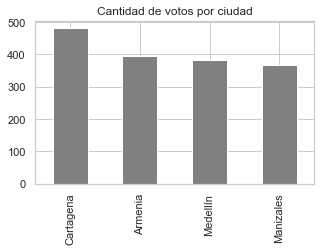

In [7]:
sns.set(style="whitegrid")

datos2['Ciudad'].value_counts().plot(kind="bar",
                                    figsize=(5,3),
                                    title="Cantidad de votos por ciudad",
                                    color="grey")


datos2['Ciudad'].value_counts()

F    971
M    653
Name: genero, dtype: int64

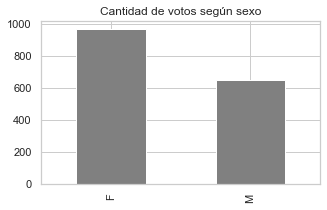

In [8]:
datos2['genero'].value_counts().plot(kind="bar",
                                    figsize=(5,3),
                                    title="Cantidad de votos según sexo",
                                    color="grey")

datos2['genero'].value_counts()

21.0    263
19.0    234
20.0    204
18.0    201
22.0    167
17.0    136
23.0    120
24.0     82
25.0     64
26.0     52
16.0     45
30.0     12
28.0      9
34.0      6
29.0      5
42.0      5
27.0      5
36.0      5
2.0       5
31.0      4
Name: edad, dtype: int64

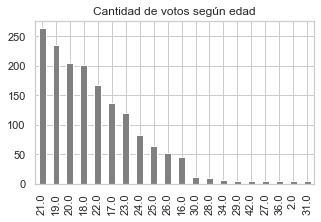

In [9]:
datos2["edad"].value_counts().plot(kind="bar",
                                    figsize=(5,3),
                                    title="Cantidad de votos según edad",
                                    color="grey")

datos2['edad'].value_counts()

In [10]:
pivot_sexo = datos2.pivot_table(index='genero',
                                        columns='SensaciónTérmica',
                                        values='TEMP',
                                        aggfunc='count')
pivot_sexo

# están muy raros esos resultados... no tienen sentido al usar MEAN o MAX o MIN
# es posible q la relación entre votos con temperatura esté errada

SensaciónTérmica,-3.0,-2.0,-1.0,0.0,1.0,2.0,3.0
genero,,,,,,,
F,12,57,103,527,159,76,37
M,3,33,100,338,110,51,18


In [11]:
sens_vis_ter = datos2.pivot_table(index='SensaciónVisual',
                                        columns='SensaciónTérmica',
                                        values='TEMP',
                                        aggfunc='count')
sens_vis_ter

SensaciónTérmica,-3.0,-2.0,-1.0,0.0,1.0,2.0,3.0
SensaciónVisual,,,,,,,
-2.0,1.0,7.0,7.0,18.0,5.0,7.0,NaN
-1.0,5.0,44.0,74.0,263.0,89.0,37.0,11.0
0.0,4.0,30.0,89.0,477.0,117.0,47.0,24.0
1.0,4.0,7.0,29.0,86.0,51.0,27.0,13.0
2.0,1.0,2.0,4.0,21.0,7.0,9.0,7.0


In [12]:
# Esto me ayuda a saber qué pasa a grandes rasgos en cada serie
# según el sexo

datos2.groupby("genero").count()

,Ciudad,edad,SensaciónVisual,SensaciónTérmica,PreferenciaVisual,PreferenciaTérmica,Rango_EH_media,Rango_EV_media,TEMP,HUMEDAD
genero,,,,,,,,,,
F,971,971,971,971,971,971,971,971,971,971
M,653,653,653,653,653,653,653,653,653,653


In [13]:
datos2.groupby("genero").mean()

,edad,SensaciónVisual,SensaciónTérmica,PreferenciaVisual,PreferenciaTérmica,Rango_EH_media,Rango_EV_media,TEMP,HUMEDAD
genero,,,,,,,,,
F,20.153450,-0.136972,0.174047,0.695160,-0.663234,2.084449,1.991761,26.391555,61.237487
M,21.598775,-0.246554,0.139357,0.695253,-0.848392,2.091884,2.000000,26.494640,60.728790


In [328]:
datos2.groupby("genero").median()

,edad,SensaciónVisual,SensaciónTérmica,PreferenciaVisual,PreferenciaTérmica,Rango_EH_media,Rango_EV_media,TEMP,HUMEDAD
genero,,,,,,,,,
F,20.0,0.0,0.0,1.0,0.0,2.0,2.0,26.8,60.5
M,21.0,0.0,0.0,1.0,-1.0,2.0,2.0,27.2,58.9


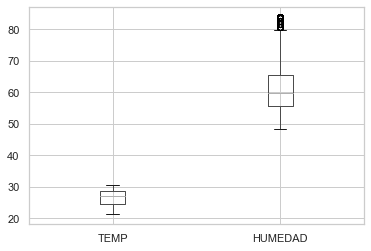

In [14]:
datos2[['TEMP','HUMEDAD']].boxplot()

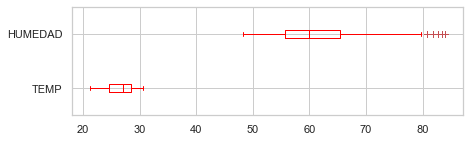

In [330]:
datos2[['TEMP','HUMEDAD']].plot.box(color="red",
                                   sym='r+', figsize=(7,2),
                                   vert=False)

Armenia           AxesSubplot(0.1,0.559091;0.363636x0.340909)
Cartagena    AxesSubplot(0.536364,0.559091;0.363636x0.340909)
Manizales             AxesSubplot(0.1,0.15;0.363636x0.340909)
Medellín         AxesSubplot(0.536364,0.15;0.363636x0.340909)
dtype: object

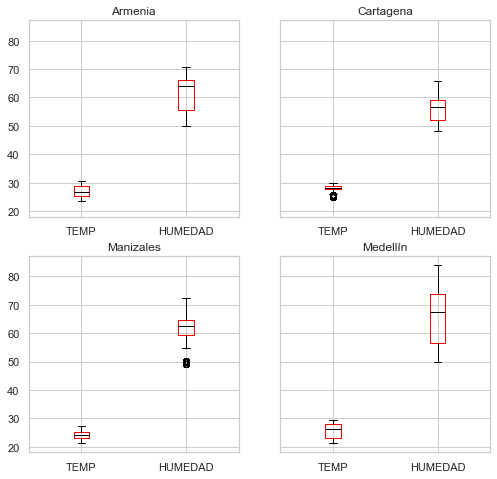

In [15]:
color = {'boxes': 'red', 'whiskers': "black",  'medians': 'Black', 'caps': 'black'}

datos2[['TEMP','HUMEDAD','Ciudad']].groupby('Ciudad').boxplot(color=color, figsize=(8,8))

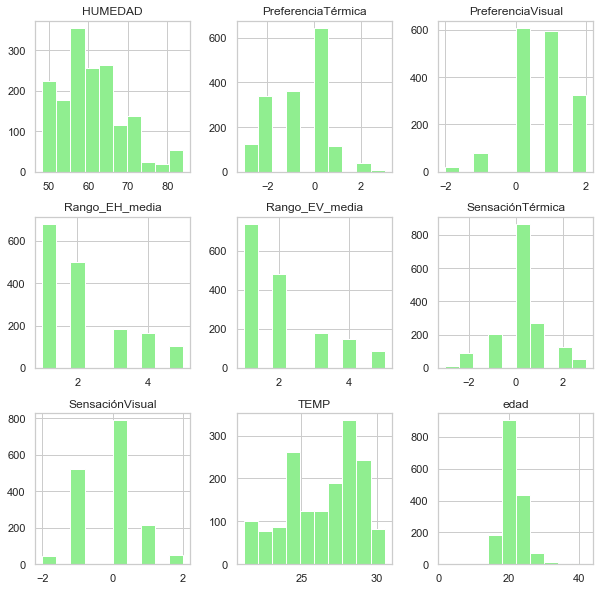

In [16]:
datos2.hist(figsize=(10,10), color="LightGreen");

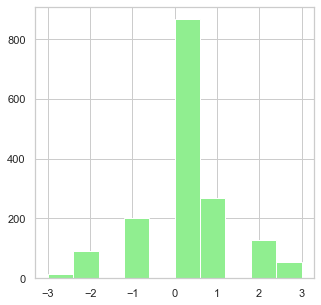

In [333]:
datos2["SensaciónTérmica"].hist(figsize=(5,5),
                               color="LightGreen")

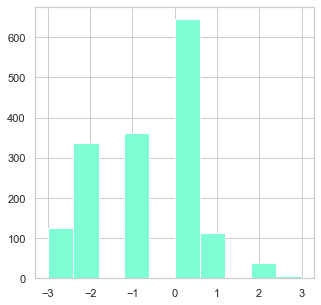

In [334]:
datos2["PreferenciaTérmica"].hist(figsize=(5,5),
                                 color="aquamarine",
                                )

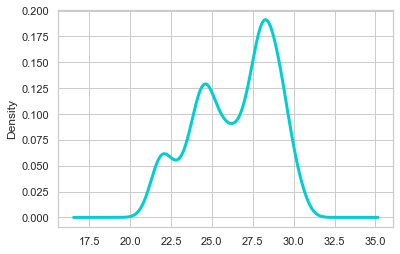

In [335]:
datos2['TEMP'].plot.kde(color="darkturquoise", lw=3)

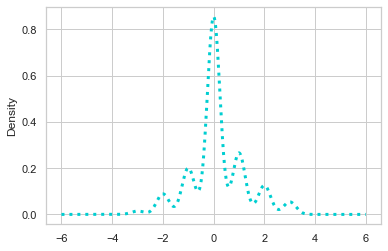

In [336]:
datos2['SensaciónTérmica'].plot.kde(color="darkturquoise",
                                   lw=3, linestyle=":")

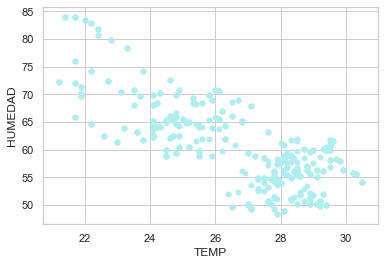

In [337]:
datos2.plot.scatter(x='TEMP', y='HUMEDAD', color="paleturquoise")

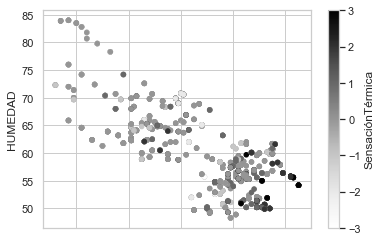

In [338]:
datos2.plot.scatter(x='TEMP', y='HUMEDAD', c="SensaciónTérmica",
                   )

/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1742: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  f.tight_layout()


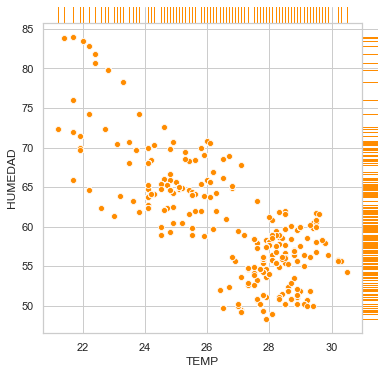

In [339]:
x=datos2["TEMP"]
y=datos2['HUMEDAD']

grid = sns.JointGrid(x, y, space=0, height=6, ratio=20)
grid.plot_joint(sns.scatterplot, color="darkorange")
grid.plot_marginals(sns.rugplot, height=1, color="darkorange")

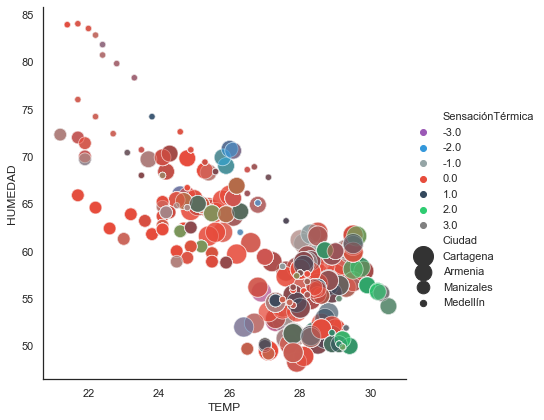

In [340]:
sns.set(style="white")

#palette=sns.cubehelix_palette(7, start=1, rot=-.75)
flatui = ["#9b59b6", "#3498db", "#95a5a6", 
          "#e74c3c", "#34495e", "#2ecc71", "grey"]
 
             #palette=palette,
             #palette="GnBu_d",
             #palette="RdBu_r",
             #palette="husl",
             #palette="hls",
             #palette=flatui,

sns.relplot(x="TEMP", y="HUMEDAD", hue="SensaciónTérmica", size="Ciudad",
            sizes=(40, 400), alpha=.5, palette=flatui,
            height=6, data=datos2)


In [93]:
from pandas.plotting import scatter_matrix

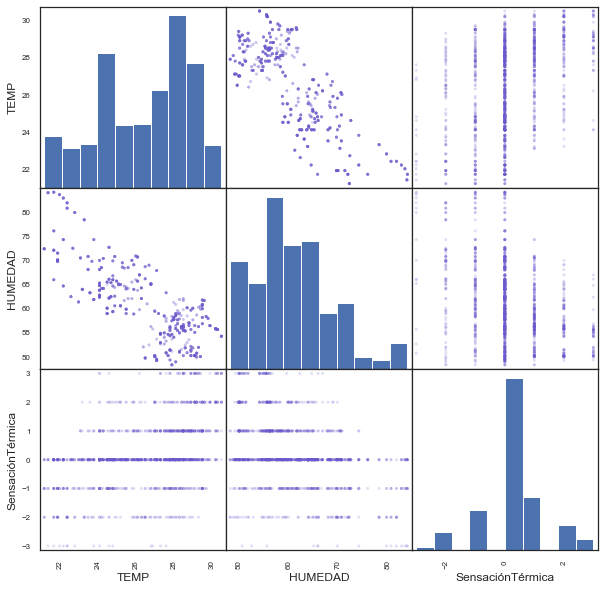

In [341]:
scatter_matrix(datos2[['TEMP','HUMEDAD','SensaciónTérmica']],
               alpha=0.2, figsize=(10,10), diagonal='hist', color="slateblue");

In [96]:
from pandas.plotting import parallel_coordinates

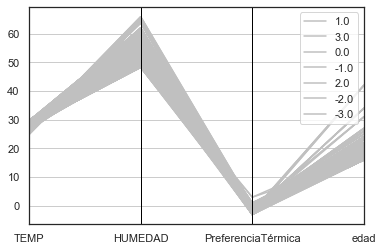

In [342]:
#datos[['TEMP','HUMEDAD','SensaciónTérmica','Air velocity (m/s)']].iloc[:500].info()
parallel_coordinates(datos2[['TEMP','HUMEDAD',
                               'SensaciónTérmica',
                               'PreferenciaTérmica',
                           "edad",
                           ]].iloc[:500],
                     'SensaciónTérmica', color="silver");

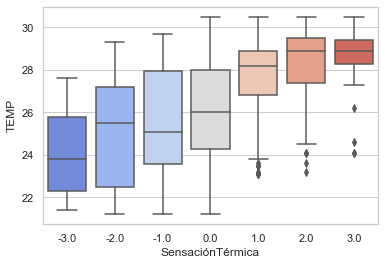

In [17]:
fig, ax = plt.subplots()
# the size of A4 paper
#fig.set_size_inches(10,10)

sns.boxplot(x="SensaciónTérmica", y="TEMP", data=datos2,
           palette=sns.color_palette("coolwarm", 7))

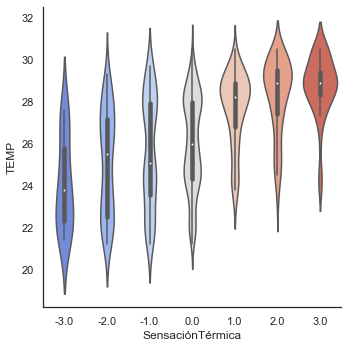

In [344]:
sns.catplot(x="SensaciónTérmica", y="TEMP",
            data=datos2, kind="violin",
            palette=sns.color_palette("coolwarm", 7))


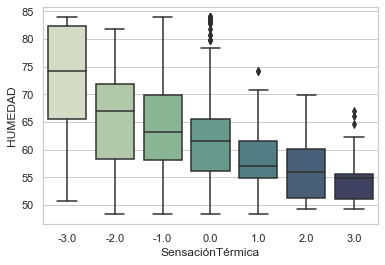

In [18]:
sns.boxplot(x="SensaciónTérmica", y="HUMEDAD", data=datos2,
           palette=sns.cubehelix_palette(8, start=.5, rot=-.75))

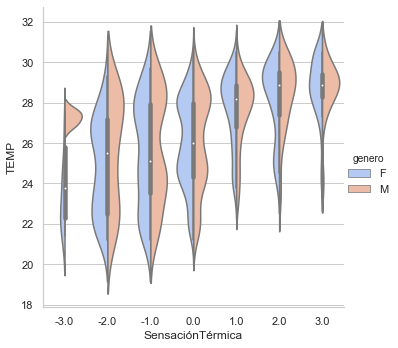

In [19]:
sns.catplot(x="SensaciónTérmica", y="TEMP", hue="genero",
            kind="violin", split=True, palette=sns.color_palette("coolwarm", 2),
            data=datos2)


#sns.catplot(x="ThermalSensation_rounded", y="Air temperature (C)", hue="Sex",
 #           kind="violin", split=True, palette=sns.color_palette("coolwarm", 2), data=ieq_data)

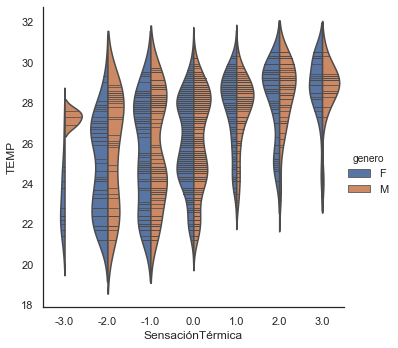

In [347]:
sns.catplot(x="SensaciónTérmica", y="TEMP", hue="genero",
            kind="violin", inner="stick", split=True, data=datos2)


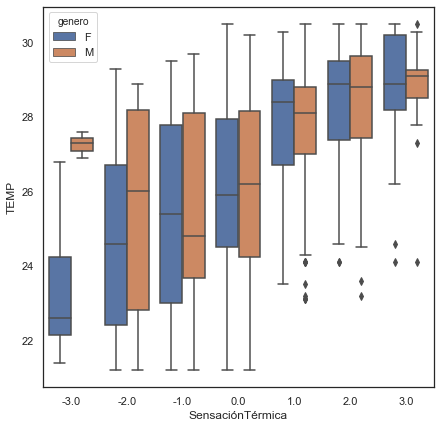

In [348]:
fig, ax = plt.subplots()
fig.set_size_inches(7,7)
sns.boxplot(x="SensaciónTérmica", y="TEMP", hue="genero",
            data=datos2)

# Revisar votos Masculino con sensación térmica "-3" y temperatura cercana a 28C

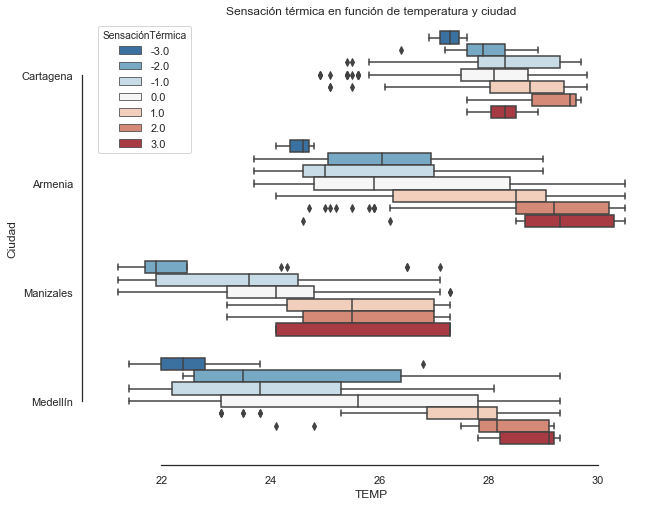

In [349]:
# Aquí va un primer intento por encontrar qué está pasando:

fig, ax = plt.subplots()
fig.set_size_inches(10,8)
sns.boxplot(y="Ciudad", x="TEMP",
            hue="SensaciónTérmica", palette="RdBu_r",
            data=datos2[["Ciudad","TEMP","SensaciónTérmica"]].dropna())
plt.title("Sensación térmica en función de temperatura y ciudad", )
sns.despine(offset=10, trim=True)

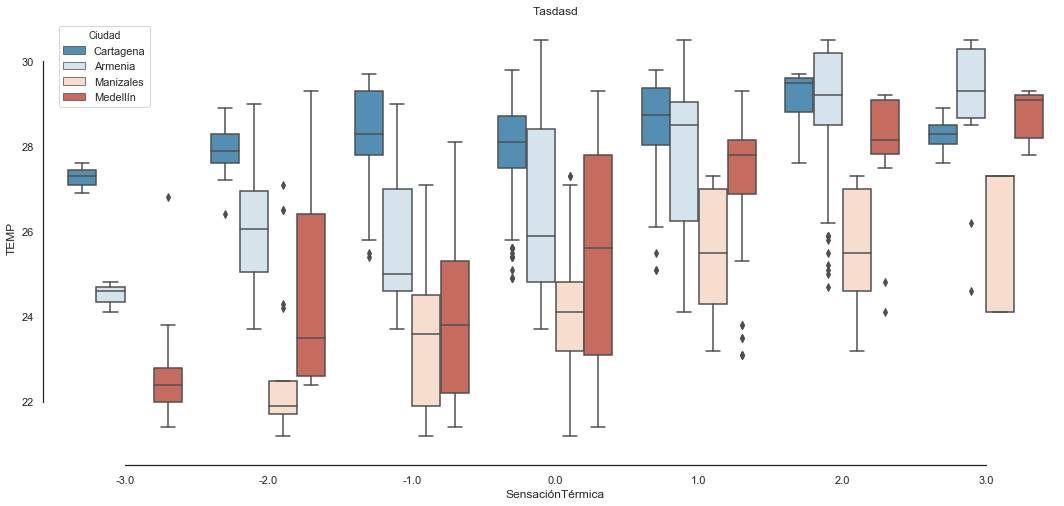

In [350]:
fig, ax = plt.subplots()
fig.set_size_inches(18,8)

sns.boxplot(y="TEMP", x="SensaciónTérmica",
            hue="Ciudad", palette="RdBu_r",
            data=datos2[["Ciudad","TEMP","SensaciónTérmica"]].dropna())
plt.title("Tasdasd")
sns.despine(offset=10, trim=True)

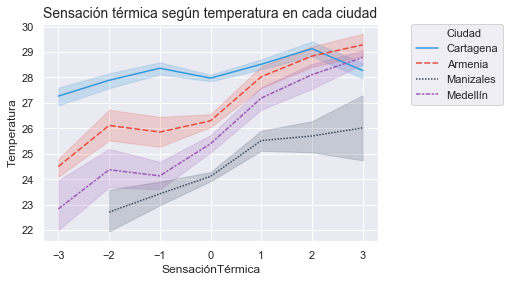

In [351]:
# Este es otro tipo de gráfico con SEABORN

sns.set(style="darkgrid")
#sns.set(style="white")
#sns.set(style="ticks")

#palette=sns.cubehelix_palette(4, start=1, rot=-.75)
flatui = ["#3498db", "#e74c3c", "#34495e", "#9b59b6"]

# Plot
sns.lineplot(x="SensaciónTérmica", y="TEMP",
             hue="Ciudad", style="Ciudad", 
             #palette=palette,
             #palette="GnBu_d",
             #palette="RdBu_r",
             #palette="husl",
             #palette="hls",
             palette=flatui,
             data=datos2)

plt.ylabel("Temperatura")
plt.title("Sensación térmica según temperatura en cada ciudad", fontsize=14)

plt.legend(bbox_to_anchor=(1.1, 1), loc='upper left', borderaxespad=0)

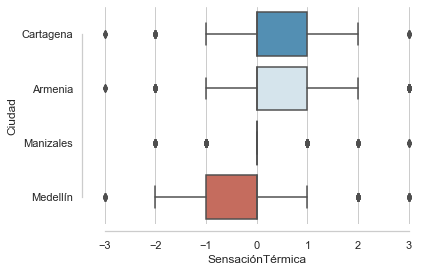

In [352]:
sns.set(style="whitegrid")

fig, ax = plt.subplots()
# fig.set_size_inches(5,5)
sns.boxplot(y="Ciudad", x="SensaciónTérmica",
             palette="RdBu_r",
            data=datos2[["Ciudad","SensaciónTérmica"]].dropna())

sns.despine(offset=7, trim=True)

## Haré una diferenciación segun sexo

<class 'pandas.core.frame.DataFrame'>
Int64Index: 653 entries, 10 to 1623
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Ciudad              653 non-null    object 
 1   genero              653 non-null    object 
 2   edad                653 non-null    float64
 3   SensaciónVisual     653 non-null    float64
 4   SensaciónTérmica    653 non-null    float64
 5   PreferenciaVisual   653 non-null    float64
 6   PreferenciaTérmica  653 non-null    float64
 7   Rango_EH_media      653 non-null    float64
 8   Rango_EV_media      653 non-null    float64
 9   TEMP                653 non-null    float64
 10  HUMEDAD             653 non-null    float64
dtypes: float64(9), object(2)
memory usage: 61.2+ KB


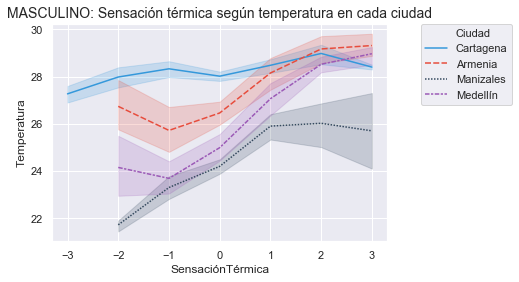

In [354]:
#Creando DF para hombres

datos_m = datos2.loc[datos2["genero"]=="M"]
datos_m.info()

sns.set(style="darkgrid")

flatui = ["#3498db", "#e74c3c", "#34495e", "#9b59b6"]

# Plot
sns.lineplot(x="SensaciónTérmica", y="TEMP",
             hue="Ciudad", style="Ciudad", 
             palette=flatui,
             data=datos_m)

plt.ylabel("Temperatura")
plt.title("MASCULINO: Sensación térmica según temperatura en cada ciudad", fontsize=14)

plt.legend(bbox_to_anchor=(1.1, 1), loc='upper left', borderaxespad=0)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 971 entries, 0 to 1614
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Ciudad              971 non-null    object 
 1   genero              971 non-null    object 
 2   edad                971 non-null    float64
 3   SensaciónVisual     971 non-null    float64
 4   SensaciónTérmica    971 non-null    float64
 5   PreferenciaVisual   971 non-null    float64
 6   PreferenciaTérmica  971 non-null    float64
 7   Rango_EH_media      971 non-null    float64
 8   Rango_EV_media      971 non-null    float64
 9   TEMP                971 non-null    float64
 10  HUMEDAD             971 non-null    float64
dtypes: float64(9), object(2)
memory usage: 91.0+ KB


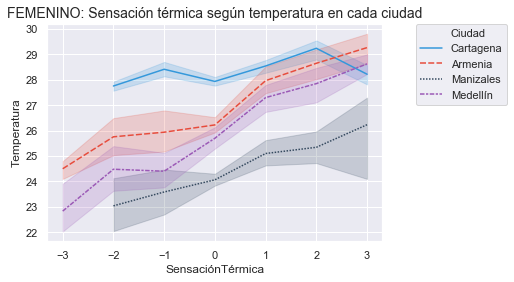

In [355]:
datos_f = datos2.loc[datos2["genero"]=="F"]
datos_f.info()

sns.set(style="darkgrid")

flatui = ["#3498db", "#e74c3c", "#34495e", "#9b59b6"]

# Plot
sns.lineplot(x="SensaciónTérmica", y="TEMP",
             hue="Ciudad", style="Ciudad", 
             palette=flatui,
             data=datos_f)

plt.ylabel("Temperatura")
plt.title("FEMENINO: Sensación térmica según temperatura en cada ciudad", fontsize=14)

plt.legend(bbox_to_anchor=(1.1, 1), loc='upper left', borderaxespad=0)

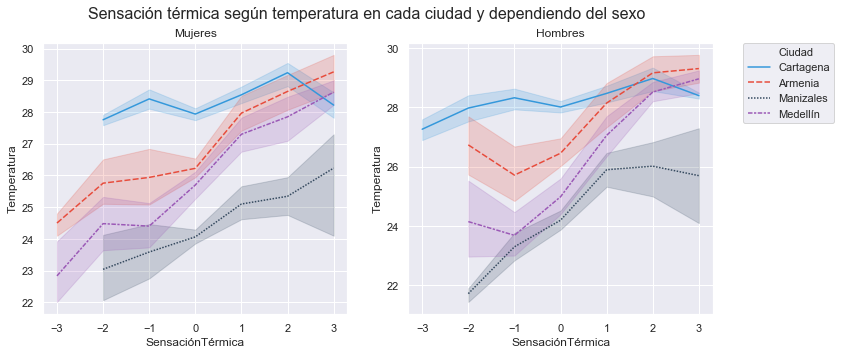

In [356]:
# Quiero plotear un gráfico al lado del otro para visualizar con más facilidad diferencias entre ambos

sns.set(style="darkgrid")
#colores de las series
flatui = ["#3498db", "#e74c3c", "#34495e", "#9b59b6"]

#Creo una figura dentro de la cual habrán varios gráficos
fig_1 = plt.figure(1, figsize=(12,5))

#configuro base del gráfico con sus respectivas variaciones:
chart_1 = fig_1.add_subplot(121) #1 (significa una línea), 2 (#columnas), 1(en cuál columna va) 
plt.title("Mujeres")
plt.xlabel("Sensación Térmica")

#Datos q se plotean dentro de ese gráfico
chart_1 = sns.lineplot(x="SensaciónTérmica", y="TEMP",
             hue="Ciudad", style="Ciudad", 
             palette=flatui,
             data=datos_f, legend=False)
plt.ylabel("Temperatura")


chart_2 = fig_1.add_subplot(122)
plt.title("Hombres")
plt.xlabel("Sensación Térmica")
          
chart_2 = sns.lineplot(x="SensaciónTérmica", y="TEMP",
             hue="Ciudad", style="Ciudad", 
             palette=flatui,
             data=datos_m)
plt.ylabel("Temperatura")

plt.suptitle("Sensación térmica según temperatura en cada ciudad y dependiendo del sexo", fontsize=16)

plt.legend(bbox_to_anchor=(1.1, 1), loc='upper left', borderaxespad=0)

# parecen haber diferencia muuuy mínimas entre ambos sexos... revisar datos originales y columnas q no tienen asignado sexo

# VERIFICAR Q HAYA CAMBIADO EN TODAS LAS CÉLULAS DONDE CORRESPONDA, DE DATOS A DATOS2

# ¿Elimino a Cartagena de esta serie debido al uso de aire acondicionado?

# Análisis:
. Con base en gráficos anteriores, eventualmente los votos de Cartagena deberían eliminarse de la muestra, debido a que en este ambiente habían dos unidades de aire acondicionado, una que funcionaba y otra que no. Podrían servir para hacer comparaciones con lo q sucede en un espacio con aire acondicionado... malo q no alcanza a acondicionar el ambiente.

. A excepeción de Cartagena, los hombres nunca dijeron experimentar sensación de -3.

. Llama la atención como en el caso de los hombres en Armenia y Medellín, pese a tener una temperatura mayor, hay votos térmicos de más frío. Explorar si eventualmente esto se debe a la hora en que se hace el experimento.




NOTAS: Necesario ver en detalle datos de DF para entender qué es lo q está ploteando el gráfico


# Datos sin Cartagena
Debido a que la sala de Cartagen, a diferencia del resto, tenía dos unidades de aire acondicionado, y una de estas estaba mala, los votos en esta ciudad son muy raros

# Preferencia
Hacer mismos gráficos con datos de preferencia